In [150]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import sys
from pathlib import Path
import glob
import shutil
import os

from fastai import *
from fastai.vision import *
from fastai.metrics import error_rate

# 


In [151]:

cwd = os.getcwd()
utils = "../tools/ai_utilities/"

In [152]:
cwd

'D:\\Google_Drive\\Scripts\\ML\\fastai\\2019\\marko_fastai\\lesson1'

# Download data from google
two options. I used the second
https://forums.fast.ai/t/tips-for-building-large-image-datasets/26688

Download geckodriverand firefox
place geckodriver .exe in path.

https://github.com/mozilla/geckodriver/releases
https://github.com/prairie-guy/ai_utilities

In [203]:
# geckodriver.exe and image_download.py need be in working directory to work.
# Download images
# Delete folder if previously run
comparison = "snowboard_skiier_bobsled"
# Doesnt work with looop

In [204]:

%run -i image_download.py --engine google snowboarder 50
%run -i image_download.py --engine google skiier 50
%run -i image_download.py --engine google bobsledder 50

os.rename("dataset", comparison)




image_download.py:108: DeprecationWarning: use options instead of firefox_options
  driver = Firefox(executable_path='geckodriver', firefox_options=options)


Using: google
Loading page...
Found Button-> 0
Page Loaded
Found 691 images
Image 1 : https://cdn.snowboarder.com/blogs.dir/1/files/2018/02/Bird_STORY_2018Winter_Olympics_Clavin332.jpg
Image 2 : https://i.ytimg.com/vi/qh6Lv8nXXvs/maxresdefault.jpg
Image 3 : https://media.swncdn.com/cms/RT/48056-kelly-clark-getty-facebook.800w.tn.jpg
Image 4 : https://resources.stuff.co.nz/content/dam/images/1/o/c/4/3/6/image.related.StuffLandscapeSixteenByNine.710x400.1oc328.png/1518370251828.jpg
Image 5 : https://resources.stuff.co.nz/content/dam/images/1/o/b/u/t/j/image.related.StuffLandscapeSixteenByNine.710x400.1obuwr.png/1518245210366.jpg
Downloaded 5/5
Using: google
Loading page...
Found Button-> 0
Page Loaded
Found 640 images
Image 1 : https://www.sportscoverdirect.com/wp-content/uploads/2016/04/skiier-e1460723316214.jpg
Image 2 : http://thehoteltelluride.com/2017/wp-content/uploads/2018/02/skiier-sunburst1000px.jpg
Image 3 : https://religionnews.com/wp-content/uploads/2018/02/webRNS-Nick-Goeppe

<Figure size 432x288 with 0 Axes>

# Rename and move
Move only pictures and rename with class labels

In [205]:
def make_output_folders_from_list(folder_list):
    for f in folder_list:
        if not os.path.exists(f):
            os.makedirs(f)
                    
def removeFile(filename):
    try:
        os.remove(filename)
    except OSError:
        pass   
        

        
img_path = comparison+"_out/images"
make_output_folders_from_list([img_path])
for d in glob.glob(comparison+"/*"):
    for f in glob.glob(d+"/*"):
#         print(d)
        if f.endswith('.jpg'):
            print("f:        ", f)
            f_new = d+"_"+Path(f).name
            print("f new:    ", f_new)
            f_out = img_path+"/"+Path(f_new).name
            print("f out:    ", f_out)
            os.rename(f, f_new) 
            shutil.move(f_new, img_path+"/"+Path(f_new).name)
        else:
            os.remove(f)


f:         snowboard_skiier_bobsled_inference\bobsledder\0.jpg
f new:     snowboard_skiier_bobsled_inference\bobsledder_0.jpg
f out:     snowboard_skiier_bobsled_inference_out/images/bobsledder_0.jpg
f:         snowboard_skiier_bobsled_inference\bobsledder\1.jpg
f new:     snowboard_skiier_bobsled_inference\bobsledder_1.jpg
f out:     snowboard_skiier_bobsled_inference_out/images/bobsledder_1.jpg
f:         snowboard_skiier_bobsled_inference\bobsledder\2.jpg
f new:     snowboard_skiier_bobsled_inference\bobsledder_2.jpg
f out:     snowboard_skiier_bobsled_inference_out/images/bobsledder_2.jpg
f:         snowboard_skiier_bobsled_inference\bobsledder\3.jpg
f new:     snowboard_skiier_bobsled_inference\bobsledder_3.jpg
f out:     snowboard_skiier_bobsled_inference_out/images/bobsledder_3.jpg
f:         snowboard_skiier_bobsled_inference\bobsledder\4.jpg
f new:     snowboard_skiier_bobsled_inference\bobsledder_4.jpg
f out:     snowboard_skiier_bobsled_inference_out/images/bobsledder_4.jpg


# Classification


In [179]:
p = 'D:/Google_Drive/Scripts/ML/fastai/2019/marko_fastai/lesson1/'
img_path = Path(p + comparison+"_out/images")
# img_path = comparison+"_out/images"

# for f in glob.glob(img_path+"/*"):
#         if f.endswith('.jpg'):
#             continue
#         else:
#             os.remove(f)

# verify_images(img_path, delete=True)
# img_path = Path(img_path)
img_path

WindowsPath('D:/Google_Drive/Scripts/ML/fastai/2019/marko_fastai/lesson1/snowboard_skiier_bobsled_out/images')

In [180]:

fnames = get_image_files(img_path)
fnames[0]

WindowsPath('D:/Google_Drive/Scripts/ML/fastai/2019/marko_fastai/lesson1/snowboard_skiier_bobsled_out/images/bobsledder_0.jpg')

In [162]:

np.random.seed(2)

# pat = re.compile(r'/([^\\]+)_\d+.jpg$')
pat = r'/([^/]+)_\d+.jpg$'
bs = 16
# bs = 16   # uncomment this line if you run out of memory even after clicking Kernel->Restart

In [181]:
data = ImageDataBunch.from_name_re(img_path, fnames, pat, ds_tfms=get_transforms(), size=224, num_workers=0, bs=bs
                                  ).normalize(imagenet_stats)



In [ ]:
data.show_batch(rows=3, figsize=(7,6))

In [182]:
print(data.classes)
len(data.classes),data.c

['bobsledder', 'skiier', 'snowboarder']


(3, 3)

In [183]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [148]:
#learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

In [184]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.248594,0.784652,0.333333,00:09
1,0.910211,0.526142,0.190476,00:09
2,0.701583,0.493286,0.238095,00:08
3,0.564896,0.501147,0.238095,00:08


In [185]:
learn.save('stage-1_cleaned')

In [186]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()
len(data.valid_ds)==len(losses)==len(idxs)

True

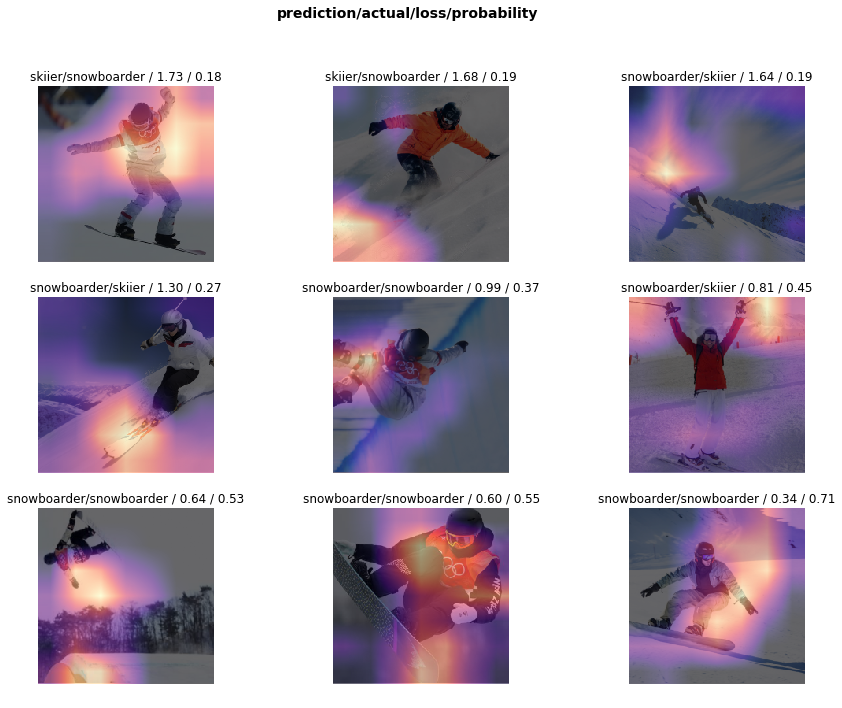

In [187]:
interp.plot_top_losses(9, figsize=(15,11))

In [170]:

doc(interp.plot_top_losses)

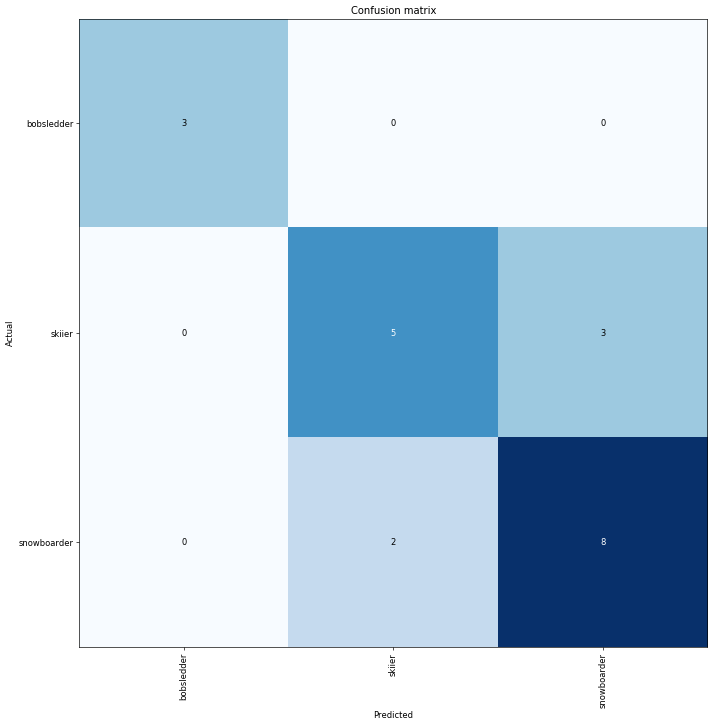

In [188]:

interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [189]:
interp.most_confused(min_val=2)

[('skiier', 'snowboarder', 3), ('snowboarder', 'skiier', 2)]

In [190]:
learn.unfreeze()

In [191]:

learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.359625,1.453048,0.428571,00:08


In [192]:
learn.load('stage-1_cleaned')

Learner(data=ImageDataBunch;

Train: LabelList (84 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
bobsledder,bobsledder,bobsledder,bobsledder,bobsledder
Path: D:\Google_Drive\Scripts\ML\fastai\2019\marko_fastai\lesson1\snowboard_skiier_bobsled_out\images;

Valid: LabelList (21 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
snowboarder,snowboarder,skiier,skiier,skiier
Path: D:\Google_Drive\Scripts\ML\fastai\2019\marko_fastai\lesson1\snowboard_skiier_bobsled_out\images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequenti

In [193]:

learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


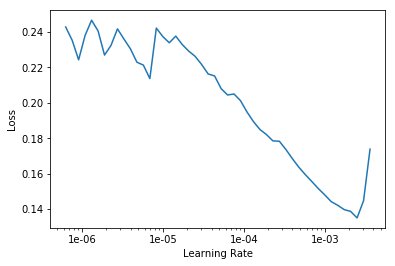

In [194]:

learn.recorder.plot()

In [195]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-4,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.458485,0.309204,0.190476,00:09
1,0.282881,0.291927,0.142857,00:08


# Run inference

In [208]:
# Export model
learn.export()
# Run on cpu
defaults.device = torch.device('cpu')
learn = load_learner("snowboard_skiier_bobsled_out/images/") # Loads pickl file from export

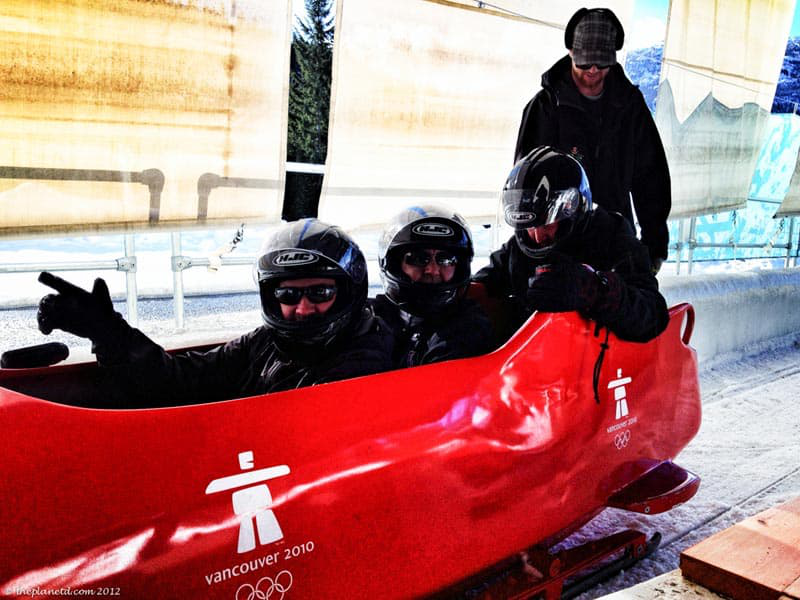

In [209]:
img = open_image("inference/bobsled-whistler-dave.jpg")
img

In [ ]:
classes = data.classes


In [212]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category bobsledder

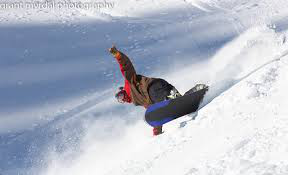

In [215]:
img = open_image("inference/snowboard_test.jpg")
img

In [216]:
# Didnt work on this one

pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category skiier

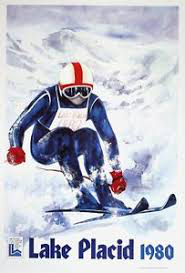

In [217]:
img = open_image("inference/skitest.jpg")
img

In [218]:
# Biffed it again!!!!

pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category bobsledder

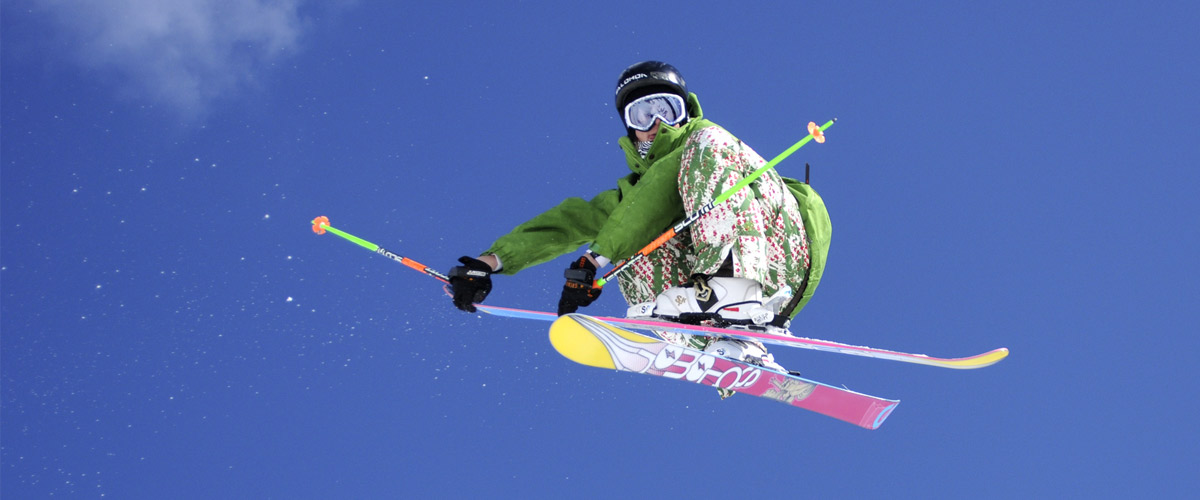

In [219]:
img = open_image("inference/skitest2.jpg")
img

In [220]:
# Noooope
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category snowboarder